# Convolutional Neural Networks (CNN)
* 컨볼루션 신경망(CNN)은 컨볼루션 레이어와 풀링을 결합한 신경망이다.  
* Gradient-based learning applied to document recognition, Y. Lecun et al., (1998). [https://ieeexplore.ieee.org/document/726791]

* 컨볼루션 레이어를 이용해서 이미지의 공간정보를 추출하고 이를 이용해서 학습을 진행한다. 따라서 일반적으로 단순한 바닐라 네트워크보다 이미지와 관련된 학습에서 더 좋은 성능을 보인다. 컨볼루션 레이어에서 실제 "학습"은 커널의 weight를 최적화하는 과정을 말한다. 

### MNIST example

In [2]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocessing
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train/255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [4]:
net = models.Sequential()
net.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu')) 
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(64,(3,3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(64, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [5]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
net.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1740 - acc: 0.9468
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0491 - acc: 0.9849
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0349 - acc: 0.9887
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0263 - acc: 0.9916
Epoch 5/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0225 - acc: 0.9926


In [7]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0320 - acc: 0.9901


### CIFAR-10 example
* https://www.cs.toronto.edu/~kriz/cifar.html

In [16]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# it takes a few minutes.

In [17]:
# preprocessing
X_train = X_train.reshape((50000, 32, 32, 3))
X_train = X_train/255

X_test = X_test.reshape((10000, 32, 32, 3))
X_test = X_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

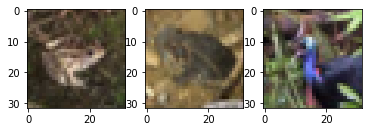

In [32]:
plt.subplot(131)
plt.imshow(X_train[22])
plt.subplot(132)
plt.imshow(X_train[23])
plt.subplot(133)
plt.imshow(X_train[24])

In [33]:
y_train[24]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

* airplane / automobile / bird / cat / deer / dog / frog / horse / ship / truck

In [20]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
nn = models.Sequential()
nn.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
nn.add(layers.MaxPooling2D((2,2)))
nn.add(layers.Conv2D(64,(3,3), activation='relu',padding='same')) 
nn.add(layers.MaxPooling2D((2,2)))
nn.add(layers.Conv2D(64,(3,3), activation='relu'))
nn.add(layers.Flatten())
nn.add(layers.Dense(512, activation='relu')) 
nn.add(layers.Dropout(0.5)) 
nn.add(layers.Dense(64, activation='relu')) 
nn.add(layers.Dropout(0.5)) 
nn.add(layers.Dense(64, activation='relu')) 
nn.add(layers.Dense(10, activation='softmax')) 
nn.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [27]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [23]:
val= nn.fit(partial_X_train, partial_y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
625/625 [==============================] - 21s 34ms/step - loss: 1.8282 - acc: 0.3095 - val_loss: 1.4000 - val_acc: 0.4957
Epoch 2/10
625/625 [==============================] - 21s 34ms/step - loss: 1.3903 - acc: 0.4960 - val_loss: 1.2271 - val_acc: 0.5614
Epoch 3/10
625/625 [==============================] - 22s 35ms/step - loss: 1.2117 - acc: 0.5706 - val_loss: 1.0937 - val_acc: 0.6093
Epoch 4/10
625/625 [==============================] - 22s 35ms/step - loss: 1.0816 - acc: 0.6252 - val_loss: 1.0192 - val_acc: 0.6482
Epoch 5/10
625/625 [==============================] - 21s 34ms/step - loss: 0.9862 - acc: 0.6624 - val_loss: 0.9432 - val_acc: 0.6794
Epoch 6/10
625/625 [==============================] - 21s 34ms/step - loss: 0.9015 - acc: 0.6906 - val_loss: 0.9682 - val_acc: 0.6725
Epoch 7/10
625/625 [==============================] - 22s 35ms/step - loss: 0.8279 - acc: 0.7194 - val_loss: 0.9137 - val_acc: 0.6928
Epoch 8/10
625/625 [==============================] - 22s 35ms

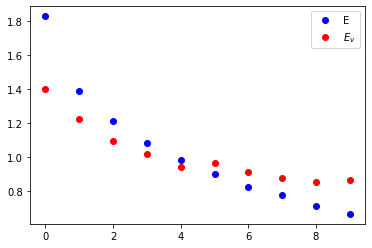

In [24]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

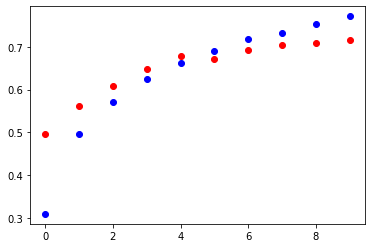

In [25]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [26]:
test_loss, test_acc = nn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8834 - acc: 0.7093


* CNN을 이용한 좋은 알고리듬들을 살펴보자. https://keras.io/api/applications/